In [96]:
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import pandas as pd
prices = pd.read_csv('class-notes/notebooks_and_codem01_v02/nb/data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


<AxesSubplot:>

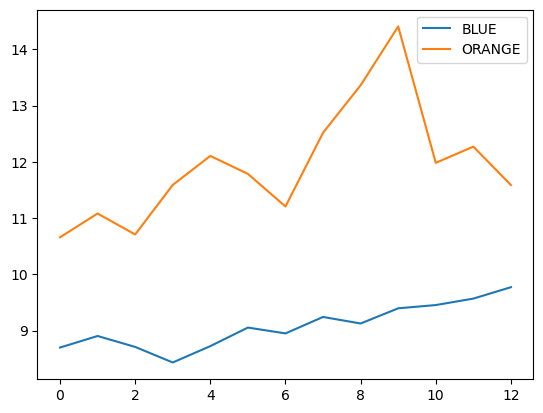

In [84]:
prices.plot()

# Returns

$$ R_{t, t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [33]:
prices[1:]

,BLUE,ORANGE
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080
10,9.4554,11.9837


In [35]:
prices[:-1]

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [53]:
prices.iloc[1:] / prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [52]:
prices / prices.shift(1) -1 

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [55]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:>

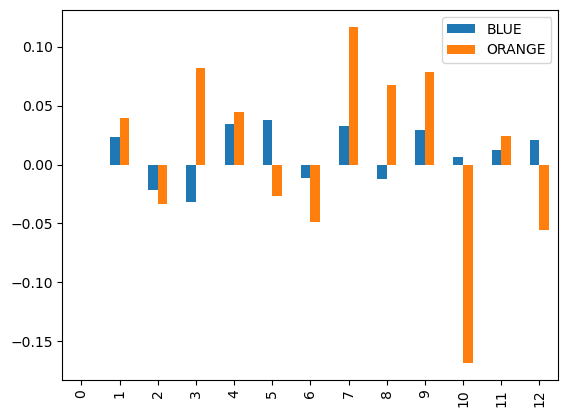

In [85]:
returns.plot.bar()

# Compounding Returns

$$ C_{t} = \prod_{1}^{t} (1 + R_t) - 1 $$

In [58]:
np.prod(returns + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [83]:
r_c = 1
for r in returns.dropna().index:
    r_c *= (returns.iloc[r] + 1)

r_c - 1

BLUE      0.123310
ORANGE    0.087167
Name: 1, dtype: float64

# Annualized returns

$$  A_{t} = (1 + R_t)^{12} - 1 $$

In [60]:
(1 + returns)**12 - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.323332,0.594805
2,-0.232469,-0.336746
3,-0.321143,1.581323
4,0.501932,0.687029
5,0.560612,-0.274452
6,-0.129091,-0.454066
7,0.470860,2.772893
8,-0.140954,1.186224
9,0.418810,1.469624


<AxesSubplot:>

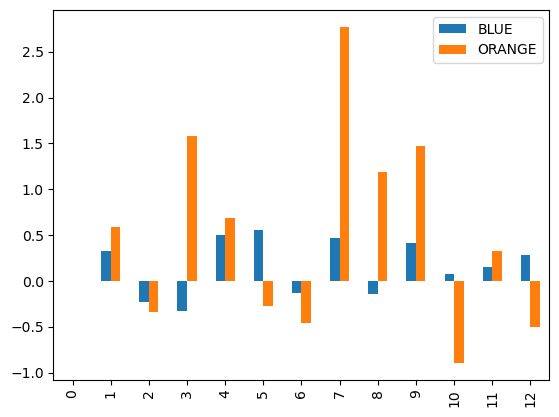

In [86]:
pd.DataFrame((1 + returns)**12 - 1).plot.bar()

In [19]:
pd.DataFrame(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

# Annualized mean return

In [23]:
(1 + returns.mean())**12 - 1

BLUE      0.126824
ORANGE    0.126823
dtype: float64

# Mean of annualized returns

In [92]:
((1 + returns)**12 - 1).mean()

BLUE      0.164154
ORANGE    0.514109
dtype: float64

# Volatility and Risk

In [88]:
portfolios_all = pd.read_csv(
    "class-notes/notebooks_and_codem01_v02/nb/data/Portfolios_Formed_on_ME_monthly_EW.csv", 
    index_col=0, 
    na_values=-99.99, 
    header=0, 
    parse_dates=True
)
portfolios_all

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [93]:
columns = {"old": ["Lo 10", "Hi 10"], "new":["SmallCap", "LargeCap"]}
portfolios = portfolios_all[columns["old"]]/100
portfolios.head(5)

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [94]:
portfolios.columns = columns["new"]

<AxesSubplot:>

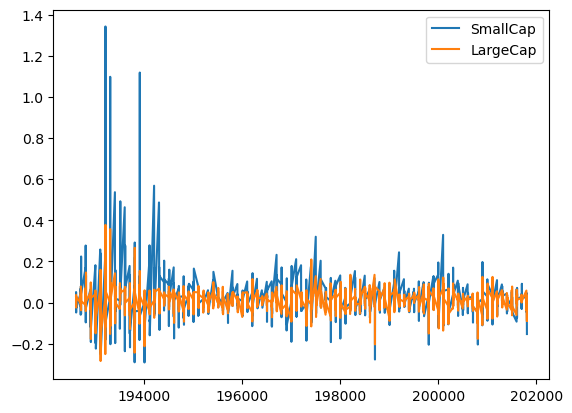

In [95]:
portfolios.plot.line()

In [125]:
portfolios.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [126]:
portfolios.index = pd.to_datetime(portfolios.index, format="%Y%m").to_period()

In [127]:
portfolios

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


<AxesSubplot:>

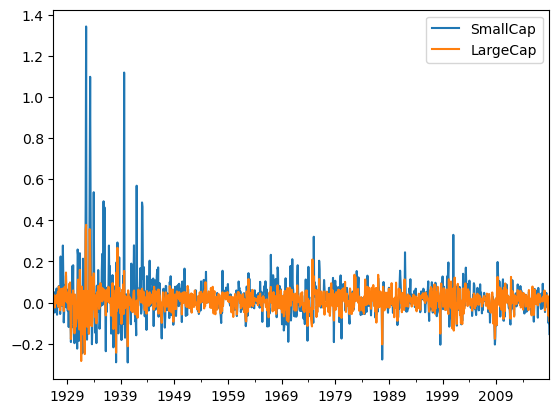

In [129]:
portfolios.plot.line()

<AxesSubplot:>

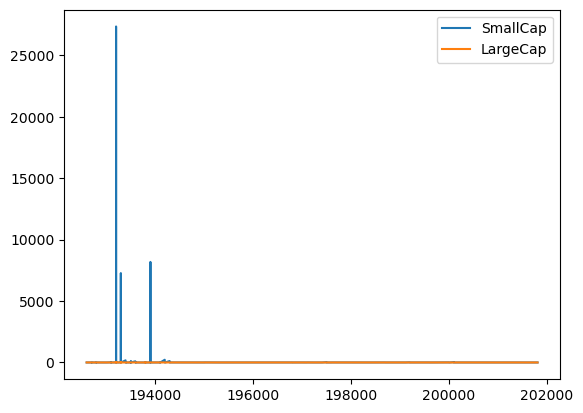

In [97]:
port_ann = (1 + portfolios)**12 - 1
port_ann.plot.line()

<AxesSubplot:>

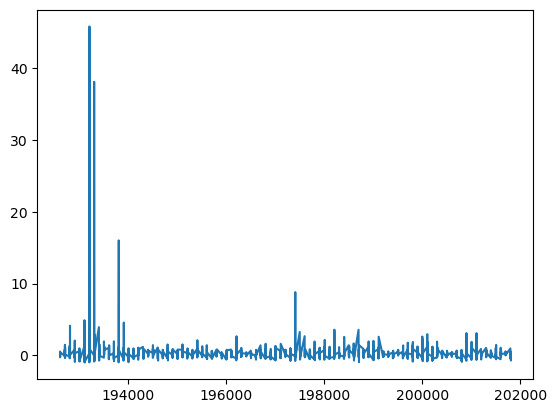

In [99]:
port_ann["LargeCap"].plot.line()

# Volatility

$$ \sigma = \sqrt{\frac{\sum_1^T( r_t - E(r))}{T-1}} $$

In [109]:
(((portfolios - portfolios.mean())**2).sum() / (portfolios.shape[0] - 1))**(1/2)

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [100]:
vol = portfolios.std()
vol

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

# Annualized volatility

$$ \sigma_{an} = \sigma * \sqrt{h} $$

If daily data is used the interval is one trading day and we use h = 252, if the interval is a week, h = 52 and h = 12 for monthly data. 

In [111]:
ann_vol = portfolios.std() * (12**0.5)
ann_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [112]:
comp_returns = (1 + portfolios).prod() - 1
comp_returns

SmallCap    1.659582e+06
LargeCap    3.674948e+03
dtype: float64

In [113]:
mens_comp_returns = (1 + comp_returns)**(1/portfolios.shape[0]) - 1
mens_comp_returns

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [114]:
(1 + mens_comp_returns)**portfolios.shape[0] - 1

SmallCap    1.659582e+06
LargeCap    3.674948e+03
dtype: float64

In [115]:
ann_comp_returns = (1 + mens_comp_returns)**12 - 1
ann_comp_returns

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

$$ R_{a} =  [{\prod_{t = 1}^T{(1 + r_t)}}]^{12/T} - 1 $$

In [117]:
(1 + portfolios).prod()**(12/portfolios.shape[0]) - 1

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [118]:
ann_comp_returns/ann_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [119]:
risk_free_rate = 0.03
(ann_comp_returns - risk_free_rate)/ann_vol

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [120]:
(((1 + portfolios_all/100).prod())**(12/portfolios_all.shape[0]) - 1 - risk_free_rate) / ((portfolios_all/100).std() * 12**0.5)

<= 0           NaN
Lo 30     0.361450
Med 40    0.346449
Hi 30     0.358843
Lo 20     0.362271
Qnt 2     0.326730
Qnt 3     0.350643
Qnt 4     0.358883
Hi 20     0.351023
Lo 10     0.373346
Dec 2     0.292848
Dec 3     0.320680
Dec 4     0.327587
Dec 5     0.331010
Dec 6     0.366129
Dec 7     0.348094
Dec 8     0.363190
Dec 9     0.355621
Hi 10     0.336392
dtype: float64

In [121]:
portfolios

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [122]:
cumprod = np.cumprod(1 + portfolios["SmallCap"])
cumprod

192607    9.855000e-01
192608    1.035958e+00
192609    1.045592e+00
192610    9.949854e-01
192611    9.872245e-01
              ...     
201808    2.298938e+06
201809    2.260316e+06
201810    2.033832e+06
201811    1.959597e+06
201812    1.659583e+06
Name: SmallCap, Length: 1110, dtype: float64

<AxesSubplot:>

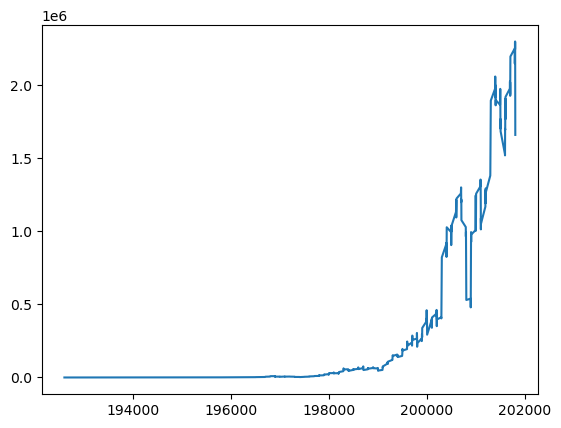

In [123]:
cumprod.plot.line()

# Wealth index

In [131]:
wealth_index = 1000*(portfolios + 1).cumprod()
wealth_index

,SmallCap,LargeCap
1926-07,9.855000e+02,1.032900e+03
1926-08,1.035958e+03,1.071117e+03
1926-09,1.045592e+03,1.078294e+03
1926-10,9.949854e+02,1.052091e+03
1926-11,9.872245e+02,1.080498e+03
...,...,...
2018-08,2.298938e+09,4.175915e+06
2018-09,2.260316e+09,4.212246e+06
2018-10,2.033832e+09,3.935501e+06
2018-11,1.959597e+09,4.035069e+06


<AxesSubplot:>

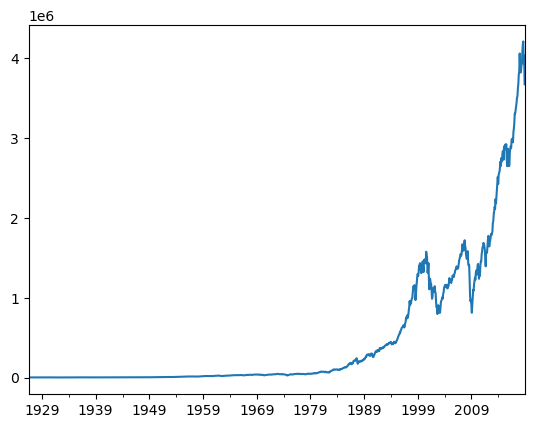

In [133]:
wealth_index["LargeCap"].plot.line()

<AxesSubplot:>

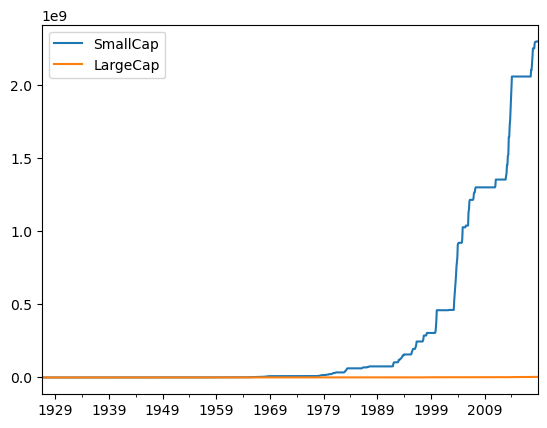

In [134]:
wealth_index_cummax = wealth_index.cummax()
wealth_index_cummax.plot()

# Drawdowns

In [135]:
drawdown = (wealth_index - wealth_index_cummax)/wealth_index_cummax

<AxesSubplot:>

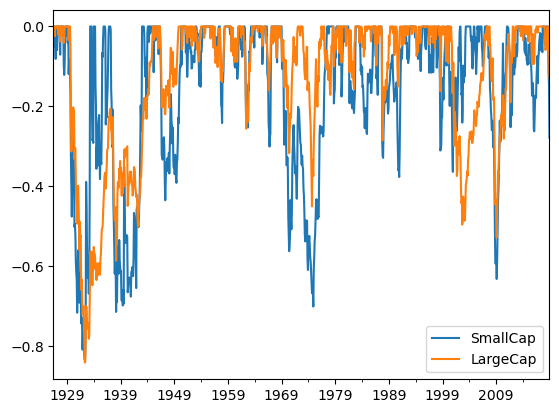

In [136]:
drawdown.plot()

<AxesSubplot:>

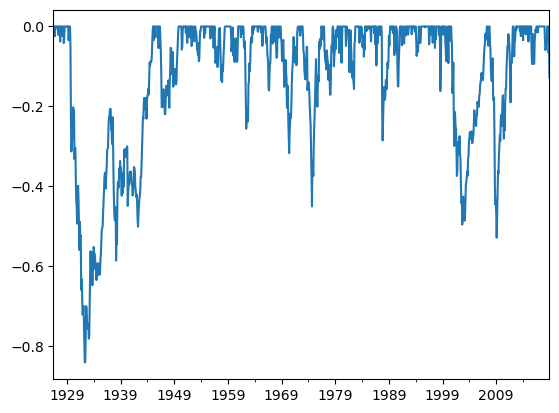

In [139]:
    def vol_an(serie: pd.Series):
        # 1 calculate wealth index
        wealth_index = 1000 * (serie + 1).cumprod()
        # 2 calculate previous max
        wealth_index_cummax = wealth_index.cummax()
        # 3 calculate drawdowns
        drawdowns = (wealth_index - wealth_index_cummax) / wealth_index_cummax
        
        return pd.DataFrame(
            {
                "wealth_index":        wealth_index,
                "wealth_index_cummax": wealth_index_cummax,
                "drawdowns" :          drawdowns
            }
        )
    
    vol_an(portfolios["LargeCap"])["drawdowns"].plot()

<AxesSubplot:>

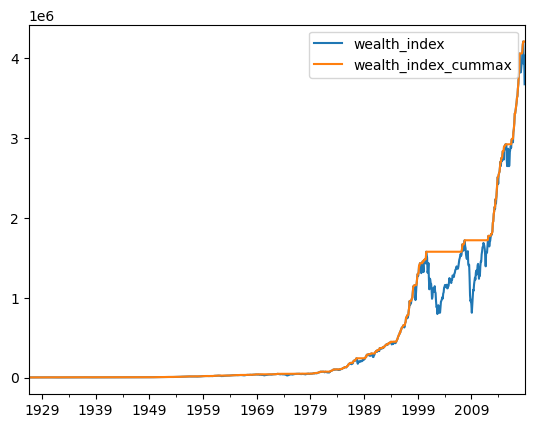

In [142]:
vol_an(portfolios["LargeCap"])[["wealth_index", "wealth_index_cummax"]].plot()

# VaR - Value at Risk

In [196]:
import wealth_index as wi

In [146]:
highCap_serie = wi.return_serie(portfolios["LargeCap"])

In [147]:
highCap_serie.wealth_index()

,LargeCap
1926-07,1.032900e+03
1926-08,1.071117e+03
1926-09,1.078294e+03
1926-10,1.052091e+03
1926-11,1.080498e+03
...,...
2018-08,4.175915e+06
2018-09,4.212246e+06
2018-10,3.935501e+06
2018-11,4.035069e+06


<AxesSubplot:>

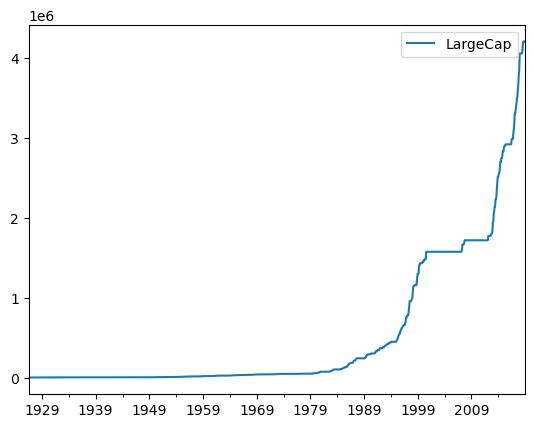

In [148]:
highCap_serie.wealth_index_cummax().plot()

In [155]:
highCap_serie.drawdowns()

,LargeCap
1926-07,0.000000
1926-08,0.000000
1926-09,0.000000
1926-10,-0.024300
1926-11,0.000000
...,...
2018-08,0.000000
2018-09,0.000000
2018-10,-0.065700
2018-11,-0.042062


<AxesSubplot:>

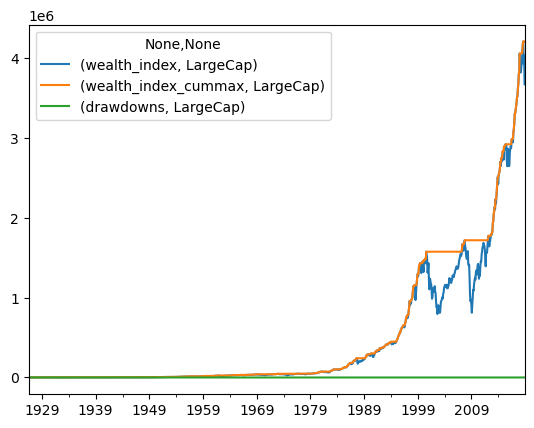

In [176]:
highCap_serie.df().plot()

# Devitiation from normality

In [197]:
highCap_serie.semi_deviation()

LargeCap    0.038171
dtype: float64

In [198]:
highCap_serie.skew()

LargeCap    0.233761
dtype: float64

In [199]:
((highCap_serie - highCap_serie.mean())**3).mean() / highCap_serie.var()**(3/2)

LargeCap    0.23313
dtype: float64

In [200]:
highCap_serie.kurt()

LargeCap    7.734852
dtype: float64

In [201]:
((highCap_serie - highCap_serie.mean())**4).mean() / highCap_serie.var()**2

LargeCap    10.675393
dtype: float64